In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/MyDrive/GITHUB/Kaggle

/content/gdrive/MyDrive/GITHUB/Kaggle


In [ ]:
! git clone https://github.com/somdipdey/FoodSQRBlock-Digitizing-Food-Supply-Chain-Using-Blockchain-And-QR-Code.git

Cloning into 'FoodSQRBlock-Digitizing-Food-Supply-Chain-Using-Blockchain-And-QR-Code'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 29 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [ ]:
!apt install libzbar0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 193 kB of archives.
After this operation, 760 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4lconvert0 amd64 1.14.2-1 [76.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4l-0 amd64 1.14.2-1 [41.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libzbar0 amd64 0.10+doc-10.1build2 [75.7 kB]
Fetched 193 kB in 1s (255 kB/s)
Selecting previously unselected package libv4lconvert0:amd64.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../libv4lconvert0_1.14.2-1_amd64.deb ...
Unpacking libv4lconvert0:amd64 (1.14.2-1) ...
Selecting p

In [ ]:
! pip install -r /content/gdrive/MyDrive/GITHUB/FoodSQRBlock-Digitizing-Food-Supply-Chain-Using-Blockchain-And-QR-Code/requirements.txt

In [ ]:
!pip install  opencv-python==3.4.2.17
!pip install  opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 2.5 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 30.6 MB 1.5 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
! pip install matplotlib

In [ ]:
! python /content/gdrive/MyDrive/GITHUB/FoodSQRBlock-Digitizing-Food-Supply-Chain-Using-Blockchain-And-QR-Code/blockchain.py

Item info: 
milk;whole milk 3.5% fat;f1d09c1a07df161af59e932a3fe7c56039d81cab905170a8ece08549685cf805;1 lt;2020-07-13;2020-08-3

Item info: milk;whole milk 3.5% fat;f1d09c1a07df161af59e932a3fe7c56039d81cab905170a8ece08549685cf805;1 lt;2020-07-13;2020-08-3

First block hash: 
31f013c92aab5dd856850442501f01aaa591cc19a3057ac929584f177d00a732


Item info: milk;whole milk 3.5% fat;f1d09c1a07df161af59e932a3fe7c56039d81cab905170a8ece08549685cf805;1 lt;2020-07-13;2020-08-3

Second block hash: 
20d0b36519e662971e576380fd4a0bfd1a13e2bd6f8de101bcd8366ea35f3d98


[!] Embedded data in QR code: 
milk;whole milk 3.5% fat;f1d09c1a07df161af59e932a3fe7c56039d81cab905170a8ece08549685cf805;1 lt;2020-07-13;2020-08-3;20d0b36519e662971e576380fd4a0bfd1a13e2bd6f8de101bcd8366ea35f3d98

<Figure size 640x480 with 1 Axes>
[!] Execution time: 0.46643924713134766


In [ ]:
%matplotlib inline

In [ ]:
! python /content/gdrive/MyDrive/GITHUB/FoodSQRBlock-Digitizing-Food-Supply-Chain-Using-Blockchain-And-QR-Code/decode.py

# Unofficial Walkthrough of Vision Transformer
Hiroto Honda homepage

Open In Colab
This notebook provides the simple walkthrough of the Vision Transformer. We hope you will be able to understand how it works by looking at the actual data flow during inference.

credits:

Paper: Alexey Dosovitskiy et al., "An Image Is Worth 16x16 Words: Transformers for Image Recognition at Scale", https://arxiv.org/abs/2010.11929
Model Implementation: this notebook loads (and is inspired by) Ross Wightman (@wightmanr)'s amazing module: https://github.com/rwightman/pytorch-image-models/tree/master/timm . For the detailed codes, please refer to the repo.
The copyright of figures and demo images belongs to Hiroto Honda.

# Preparation

In [7]:
%%capture
!pip install timm

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL

import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T

from timm import create_model

# Prepare Model and Data

In [9]:
model_name = "vit_base_patch16_224"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device = ", device)
# create a ViT model : https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/vision_transformer.py
model = create_model(model_name, pretrained=True).to(device)

device =  cuda


In [10]:
# Define transforms for test
IMG_SIZE = (224, 224)
NORMALIZE_MEAN = (0.5, 0.5, 0.5)
NORMALIZE_STD = (0.5, 0.5, 0.5)
transforms = [
              T.Resize(IMG_SIZE),
              T.ToTensor(),
              T.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
              ]

transforms = T.Compose(transforms)

In [11]:
%%capture
# ImageNet Labels
!wget https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
imagenet_labels = dict(enumerate(open('ilsvrc2012_wordnet_lemmas.txt')))

# Demo Image
!wget https://github.com/hirotomusiker/schwert_colab_data_storage/blob/master/images/vit_demo/santorini.png?raw=true -O santorini.png
img = PIL.Image.open('santorini.png')
img_tensor = transforms(img).unsqueeze(0).to(device)

# Simple Inference

In [12]:
# end-to-end inference
output = model(img_tensor)

Inference Result:
dome



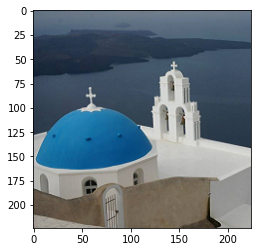

In [13]:
print("Inference Result:")
print(imagenet_labels[int(torch.argmax(output))])
plt.imshow(img)

# Dig into Vision Transformer

Let's look at the details of the Vision Transformer!


<img src='https://github.com/hirotomusiker/schwert_colab_data_storage/blob/master/images/vit_demo/vit_input.png?raw=true'>

Figure 1. Vision Transformer inference pipeline.  
1. Split Image into Patches  
The input image is split into 14 x 14 vectors with dimension of 768 by Conv2d (k=16x16) with stride=(16, 16). 
2. Add Position Embeddings  
Learnable position embedding vectors are added to the patch embedding vectors and fed to the transformer encoder. 
3. Transformer Encoder  
The embedding vectors are encoded by the transformer encoder. The dimension of input and output vectors are the same. Details of the encoder are depicted in Fig. 2.
4. MLP (Classification) Head  
The 0th output from the encoder is fed to the MLP head for classification to output the final classification results.


# 1. Split Image into Patches

The input image is split into N patches (N = 14 x 14 for ViT-Base)
and converted to D=768 embedding vectors by learnable 2D convolution:
```
Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
```

In [14]:
patches = model.patch_embed(img_tensor)  # patch embedding convolution
print("Image tensor: ", img_tensor.shape)
print("Patch embeddings: ", patches.shape)

Image tensor:  torch.Size([1, 3, 224, 224])
Patch embeddings:  torch.Size([1, 196, 768])


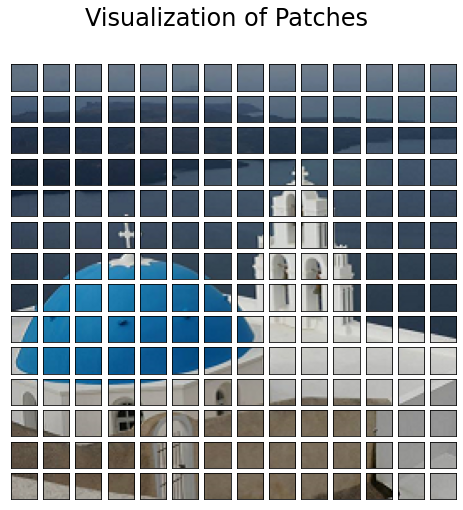

In [15]:
# This is NOT a part of the pipeline.
# Actually the image is divided into patch embeddings by Conv2d 
# with stride=(16, 16) shown above.
fig = plt.figure(figsize=(8, 8))
fig.suptitle("Visualization of Patches", fontsize=24)
fig.add_axes()
img = np.asarray(img)
for i in range(0, 196):
    x = i % 14
    y = i // 14
    patch = img[y*16:(y+1)*16, x*16:(x+1)*16]
    ax = fig.add_subplot(14, 14, i+1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(patch)

# 2. Add Position Embeddings
To make patches position-aware, learnable 'position embedding' vectors are added to the patch embedding vectors. The position embedding vectors learn distance within the image thus neighboring ones have high similarity.

### Visualization of position embeddings

In [16]:
pos_embed = model.pos_embed
print(pos_embed.shape)

torch.Size([1, 197, 768])


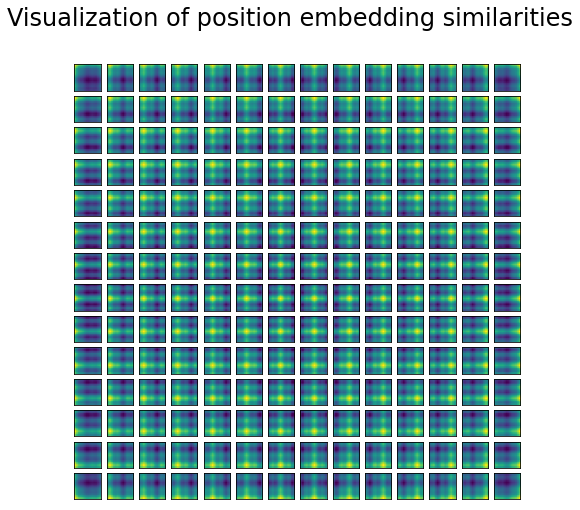

In [17]:
# Visualize position embedding similarities.
# One cell shows cos similarity between an embedding and all the other embeddings.
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
fig = plt.figure(figsize=(8, 8))
fig.suptitle("Visualization of position embedding similarities", fontsize=24)
for i in range(1, pos_embed.shape[1]):
    sim = F.cosine_similarity(pos_embed[0, i:i+1], pos_embed[0, 1:], dim=1)
    sim = sim.reshape((14, 14)).detach().cpu().numpy()
    ax = fig.add_subplot(14, 14, i)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(sim)

### Make Transformer Input
A learnable class token is prepended to the patch embedding vectors as the 0th vector.  
197 (1 + 14 x 14) learnable position embedding vectors are added to the patch embedding vectors.

In [18]:
transformer_input = torch.cat((model.cls_token, patches), dim=1) + pos_embed
print("Transformer input: ", transformer_input.shape)

Transformer input:  torch.Size([1, 197, 768])


# 3. Transformer Encoder
<img src='https://github.com/hirotomusiker/schwert_colab_data_storage/blob/master/images/vit_demo/transformer_encoder.png?raw=true'>

Figure 2. Detailed schematic of Transformer Encoder. 
- N (=197) embedded vectors are fed to the L (=12) series encoders. 
- The vectors are divided into query, key and value after expanded by an fc layer. 
- q, k and v are further divided into H (=12) and fed to the parallel attention heads. 
- Outputs from attention heads are concatenated to form the vectors whose shape is the same as the encoder input.
- The vectors go through an fc, a layer norm and an MLP block that has two fc layers.

The Vision Transformer employs the Transformer Encoder that was proposed in the [attention is all you need paper](https://papers.nips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf). 

Implementation Reference: 

- [tensorflow implementation](https://github.com/google-research/vision_transformer/blob/502746cb287a107f9911c061f9d9c2c0159c81cc/vit_jax/models.py#L62-L146)
- [pytorch implementation (timm)](https://github.com/rwightman/pytorch-image-models/blob/198f6ea0f3dae13f041f3ea5880dd79089b60d61/timm/models/vision_transformer.py#L79-L143)


### Series Transformer Encoders

In [19]:
print("Input tensor to Transformer (z0): ", transformer_input.shape)
x = transformer_input.clone()
for i, blk in enumerate(model.blocks):
    print("Entering the Transformer Encoder {}".format(i))
    x = blk(x)
x = model.norm(x)
transformer_output = x[:, 0]
print("Output vector from Transformer (z12-0):", transformer_output.shape)

Input tensor to Transformer (z0):  torch.Size([1, 197, 768])
Entering the Transformer Encoder 0
Entering the Transformer Encoder 1
Entering the Transformer Encoder 2
Entering the Transformer Encoder 3
Entering the Transformer Encoder 4
Entering the Transformer Encoder 5
Entering the Transformer Encoder 6
Entering the Transformer Encoder 7
Entering the Transformer Encoder 8
Entering the Transformer Encoder 9
Entering the Transformer Encoder 10
Entering the Transformer Encoder 11
Output vector from Transformer (z12-0): torch.Size([1, 768])


## How Attention Works

In this part, we are going to see what the actual attention looks like.

In [20]:
print("Transformer Multi-head Attention block:")
attention = model.blocks[0].attn
print(attention)
print("input of the transformer encoder:", transformer_input.shape)

Transformer Multi-head Attention block:
Attention(
  (qkv): Linear(in_features=768, out_features=2304, bias=True)
  (attn_drop): Dropout(p=0.0, inplace=False)
  (proj): Linear(in_features=768, out_features=768, bias=True)
  (proj_drop): Dropout(p=0.0, inplace=False)
)
input of the transformer encoder: torch.Size([1, 197, 768])


In [21]:
# fc layer to expand the dimension
transformer_input_expanded = attention.qkv(transformer_input)[0]
print("expanded to: ", transformer_input_expanded.shape)

expanded to:  torch.Size([197, 2304])


In [22]:
# Split qkv into mulitple q, k, and v vectors for multi-head attantion
qkv = transformer_input_expanded.reshape(197, 3, 12, 64)  # (N=197, (qkv), H=12, D/H=64)
print("split qkv : ", qkv.shape)
q = qkv[:, 0].permute(1, 0, 2)  # (H=12, N=197, D/H=64)
k = qkv[:, 1].permute(1, 0, 2)  # (H=12, N=197, D/H=64)
kT = k.permute(0, 2, 1)  # (H=12, D/H=64, N=197)
print("transposed ks: ", kT.shape)

split qkv :  torch.Size([197, 3, 12, 64])
transposed ks:  torch.Size([12, 64, 197])


attention matrix:  torch.Size([12, 197, 197])


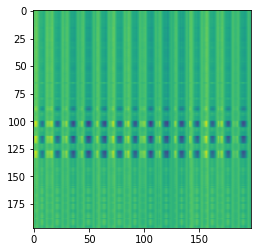

In [23]:
# Attention Matrix
attention_matrix = q @ kT
print("attention matrix: ", attention_matrix.shape)
plt.imshow(attention_matrix[3].detach().cpu().numpy())

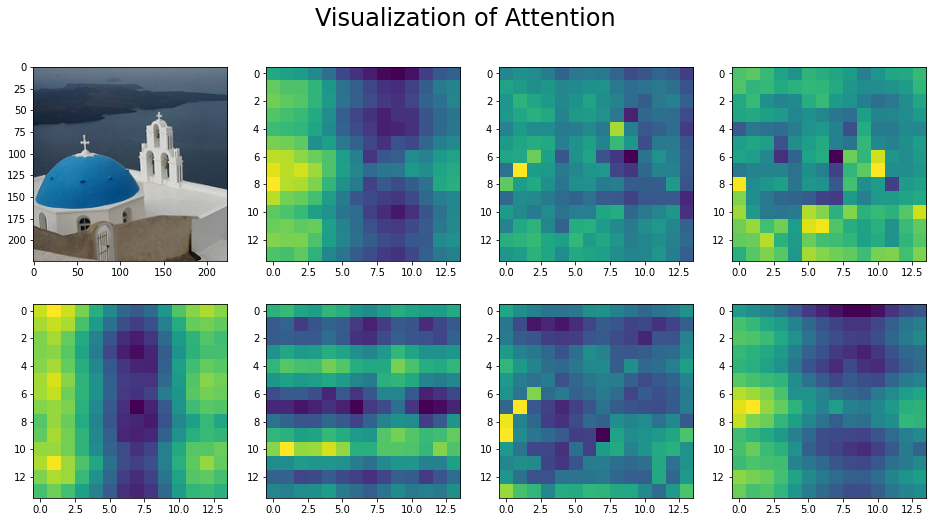

In [24]:
# Visualize attention matrix
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Visualization of Attention", fontsize=24)
fig.add_axes()
img = np.asarray(img)
ax = fig.add_subplot(2, 4, 1)
ax.imshow(img)
for i in range(7):  # visualize the 100th rows of attention matrices in the 0-7th heads
    attn_heatmap = attention_matrix[i, 100, 1:].reshape((14, 14)).detach().cpu().numpy()
    ax = fig.add_subplot(2, 4, i+2)
    ax.imshow(attn_heatmap)

# 4. MLP (Classification) Head
The 0-th output vector from the transformer output vectors (corresponding to the class token input) is fed to the MLP head.  
The 1000-dimension classification result is the output of the whole pipeline.

Classification head:  Linear(in_features=768, out_features=1000, bias=True)
Inference result : id = 538, label name = dome



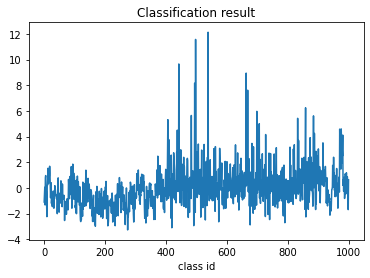

In [25]:
print("Classification head: ", model.head)
result = model.head(transformer_output)
result_label_id = int(torch.argmax(result))
plt.plot(result.detach().cpu().numpy()[0])
plt.title("Classification result")
plt.xlabel("class id")
print("Inference result : id = {}, label name = {}".format(
    result_label_id, imagenet_labels[result_label_id]))

# Off-the-shelf image classification with DeiT models on TF-Hub

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/sayakpaul/deit-tf/blob/main/notebooks/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/sayakpaul/deit-tf/blob/main/notebooks/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://tfhub.dev/sayakpaul/collections/deit/1"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub models</a>
  </td>
</table>

## Setup

In [40]:
!wget https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt -O ilsvrc2012_wordnet_lemmas.txt

--2022-05-05 12:49:13--  https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.167.128, 74.125.140.128, 142.251.5.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21675 (21K) [text/plain]
Saving to: ‘ilsvrc2012_wordnet_lemmas.txt’

ilsvrc2012_wordnet_ 100%[===================>]  21.17K  --.-KB/s    in 0.003s  

2022-05-05 12:49:13 (7.59 MB/s) - ‘ilsvrc2012_wordnet_lemmas.txt’ saved [21675/21675]



In [9]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras


from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np
import requests
import cv2

## Select a [DeiT](https://arxiv.org/abs/2012.12877) ImageNet-1k model

Find the entire collection [here](https://tfhub.dev/sayakpaul/collections/deit/1).

In [6]:
model_name = "deit_tiny_patch16_224" #@param ["deit_tiny_patch16_224", "deit_tiny_distilled_patch16_224", "deit_small_patch16_224", "deit_small_distilled_patch16_224", "deit_base_patch16_224", "deit_base_distilled_patch16_224", "deit_base_patch16_384", "deit_base_distilled_patch16_384"]

model_handle_map ={
    "deit_tiny_patch16_224": "https://tfhub.dev/sayakpaul/deit_tiny_patch16_224/1",
    "deit_tiny_distilled_patch16_224": "https://tfhub.dev/sayakpaul/deit_tiny_distilled_patch16_224/1",
    "deit_small_patch16_224": "https://tfhub.dev/sayakpaul/deit_small_patch16_224/1",
    "deit_small_distilled_patch16_224": "https://tfhub.dev/sayakpaul/deit_small_distilled_patch16_224/1",
    "deit_base_patch16_224": "https://tfhub.dev/sayakpaul/deit_base_patch16_224/1",
    "deit_base_distilled_patch16_224": "https://tfhub.dev/sayakpaul/deit_base_distilled_patch16_224/1",
    "deit_base_patch16_384": "https://tfhub.dev/sayakpaul/deit_base_patch16_384/1",
    "deit_base_distilled_patch16_384": "https://tfhub.dev/sayakpaul/deit_base_distilled_patch16_384/1",

}

input_resolution = int(model_name.split("_")[-1])
model_handle = model_handle_map[model_name]
print(f"Input resolution: {input_resolution} x {input_resolution} x 3.")
print(f"TF-Hub handle: {model_handle}.")

Input resolution: 224 x 224 x 3.
TF-Hub handle: https://tfhub.dev/sayakpaul/deit_tiny_patch16_224/1.


## Image preprocessing utilities 

In [10]:
crop_layer = keras.layers.CenterCrop(input_resolution, input_resolution)
norm_layer = keras.layers.Normalization(
    mean=[0.485 * 255, 0.456 * 255, 0.406 * 255],
    variance=[(0.229 * 255) ** 2, (0.224 * 255) ** 2, (0.225 * 255) ** 2],
)


def preprocess_image(image, size=input_resolution):
    image = np.array(image)
    image_resized = tf.expand_dims(image, 0)
    resize_size = int((256 / 224) * size)
    image_resized = tf.image.resize(image_resized, (resize_size, resize_size), method="bicubic")
    image_resized = crop_layer(image_resized)
    return norm_layer(image_resized).numpy()
    

def load_image_from_url(url):
    # Credit: Willi Gierke
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    preprocessed_image = preprocess_image(image)
    return image, preprocessed_image

## Load ImageNet-1k labels and a demo image

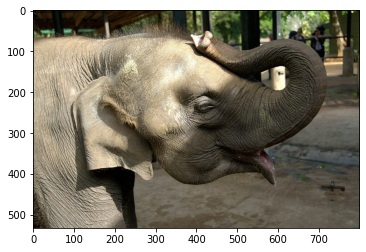

In [11]:
with open("ilsvrc2012_wordnet_lemmas.txt", "r") as f:
    lines = f.readlines()
imagenet_int_to_str = [line.rstrip() for line in lines]

img_url = "https://p0.pikrepo.com/preview/853/907/close-up-photo-of-gray-elephant.jpg"
image, preprocessed_image = load_image_from_url(img_url)

plt.imshow(image)
plt.show()

## Run inference

In [12]:
def get_model(model_url: str) -> tf.keras.Model:
    inputs = tf.keras.Input((input_resolution, input_resolution, 3))
    hub_module = hub.KerasLayer(model_url)

    outputs, _ = hub_module(inputs) # Second output in the tuple is a dictionary containing attention scores.

    return tf.keras.Model(inputs, outputs)

In [13]:
classification_model = get_model(model_handle)
predictions = classification_model.predict(preprocessed_image)
predicted_label = imagenet_int_to_str[int(np.argmax(predictions))]
print(predicted_label)

Indian_elephant, Elephas_maximus


## Obtaining attention scores

The models are capable to outputting attention scores (softmax scores) for each of the transformer blocks.

In [14]:
loaded_model = tf.keras.models.load_model(
    f"gs://tfhub-modules/sayakpaul/{model_name}/1/uncompressed"
)
logits, attention_score_dict = loaded_model(preprocessed_image)
attention_score_dict.keys()

dict_keys(['transformer_block_11_att', 'transformer_block_10_att', 'transformer_block_2_att', 'transformer_block_7_att', 'transformer_block_3_att', 'transformer_block_6_att', 'transformer_block_9_att', 'transformer_block_4_att', 'transformer_block_0_att', 'transformer_block_8_att', 'transformer_block_5_att', 'transformer_block_1_att'])

In [15]:
# (batch_size, nb_attention_heads, seq_length, seq_length)
attention_score_dict["transformer_block_5_att"].shape

TensorShape([1, 3, 197, 197])

Shoutout to [Aritra](https://github.com/ariG23498) for working on this integration.

## Visualizing attention map 

Code copied and modified from [here](https://colab.research.google.com/github/jeonsworld/ViT-pytorch/blob/main/visualize_attention_map.ipynb).

In [16]:
# Stack the individual attention matrices from individual transformer blocks.
attn_mat = tf.stack([attention_score_dict[k] for k in attention_score_dict.keys()])
attn_mat = tf.squeeze(attn_mat, axis=1)
print(attn_mat.shape)

# Average the attention weights across all heads.
attn_mat = tf.reduce_mean(attn_mat, axis=1)
print(attn_mat.shape)

# To account for residual connections, we add an identity matrix to the
# attention matrix and re-normalize the weights.
residual_attn = tf.eye(attn_mat.shape[1])
aug_attn_mat = attn_mat + residual_attn
aug_attn_mat = aug_attn_mat / tf.reduce_sum(aug_attn_mat, axis=-1)[..., None]
aug_attn_mat = aug_attn_mat.numpy()
print(aug_attn_mat.shape)

# Recursively multiply the weight matrices
joint_attentions = np.zeros(aug_attn_mat.shape)
joint_attentions[0] = aug_attn_mat[0]

for n in range(1, aug_attn_mat.shape[0]):
    joint_attentions[n] = np.matmul(aug_attn_mat[n], joint_attentions[n-1])
    
# Attention from the output token to the input space.
v = joint_attentions[-1]
grid_size = int(np.sqrt(aug_attn_mat.shape[-1]))
mask = v[0, 1:].reshape(grid_size, grid_size)
mask = cv2.resize(mask / mask.max(), image.size)[..., np.newaxis]
result = (mask * image).astype("uint8")
print(result.shape)

(12, 3, 197, 197)
(12, 197, 197)
(12, 197, 197)
(533, 800, 3)


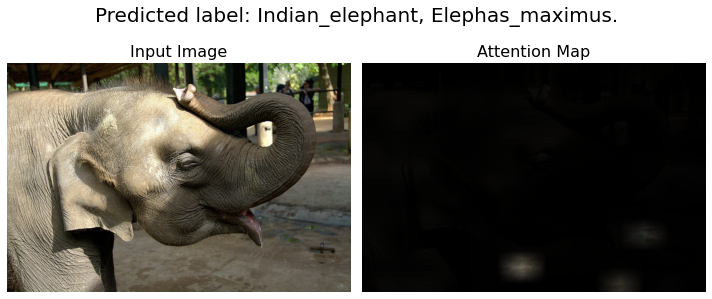

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8))
fig.suptitle(f"Predicted label: {predicted_label}.", fontsize=20)

_ = ax1.imshow(image)
_ = ax2.imshow(result)
ax1.set_title("Input Image", fontsize=16)
ax2.set_title("Attention Map", fontsize=16)
ax1.axis("off")
ax2.axis("off")

fig.tight_layout()
fig.subplots_adjust(top=1.35)
fig.show()

In [18]:
fig.savefig("attention_map.png", dpi=300, bbox_inches="tight")

# FineTune

In [20]:
from tensorflow import keras
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

tfds.disable_progress_bar()

import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# GPUs

In [21]:
try:  # detect TPUs
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()  # TPU detection
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:  # detect GPUs
    tpu = False
    strategy = (
        tf.distribute.get_strategy()
    )  # default strategy that works on CPU and single GPU
print("Number of Accelerators: ", strategy.num_replicas_in_sync)

Number of Accelerators:  1


## Configuration

Find the list of all fine-tunable models [here](https://tfhub.dev/sayakpaul/collections/deit/1#feature-extractors).

In [22]:
# Model
IMAGE_SIZE = [224, 224]
MODEL_PATH = "https://tfhub.dev/sayakpaul/deit_tiny_patch16_224_fe/1" 

# TPU
if tpu:
    BATCH_SIZE = (
        16 * strategy.num_replicas_in_sync
    )  # a TPU has 8 cores so this will be 128
else:
    BATCH_SIZE = 64  # on Colab/GPU, a higher batch size may throw(OOM)

# Dataset
CLASSES = [
    "dandelion",
    "daisy",
    "tulips",
    "sunflowers",
    "roses",
]  # don't change the order

# Other constants
MEAN = tf.constant([0.485 * 255, 0.456 * 255, 0.406 * 255])  # imagenet mean
STD = tf.constant([0.229 * 255, 0.224 * 255, 0.225 * 255])  # imagenet std
AUTO = tf.data.AUTOTUNE

# Data Pipeline

[DeiT authors](https://arxiv.org/abs/2012.12877) use a separate preprocessing pipeline for fine-tuning. But for keeping this walkthrough short and simple, we can just perform the basic ones.

In [23]:
def make_dataset(dataset: tf.data.Dataset, train: bool, image_size: int = IMAGE_SIZE):
    def preprocess(image, label):
        # for training, do augmentation
        if train:
            if tf.random.uniform(shape=[]) > 0.5:
                image = tf.image.flip_left_right(image)
        image = tf.image.resize(image, size=image_size, method="bicubic")
        image = (image - MEAN) / STD  # normalization
        return image, label

    if train:
        dataset = dataset.shuffle(BATCH_SIZE * 10)

    return dataset.map(preprocess, AUTO).batch(BATCH_SIZE).prefetch(AUTO)

# Flower Dataset

In [24]:
train_dataset, val_dataset = tfds.load(
    "tf_flowers",
    split=["train[:90%]", "train[90%:]"],
    as_supervised=True,
    try_gcs=False,  # gcs_path is necessary for tpu,
)

num_train = tf.data.experimental.cardinality(train_dataset)
num_val = tf.data.experimental.cardinality(val_dataset)
print(f"Number of training examples: {num_train}")
print(f"Number of validation examples: {num_val}")

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Number of training examples: 3303
Number of validation examples: 367


## Prepare dataset

In [25]:
train_dataset = make_dataset(train_dataset, True)
val_dataset = make_dataset(val_dataset, False)

## Visualize

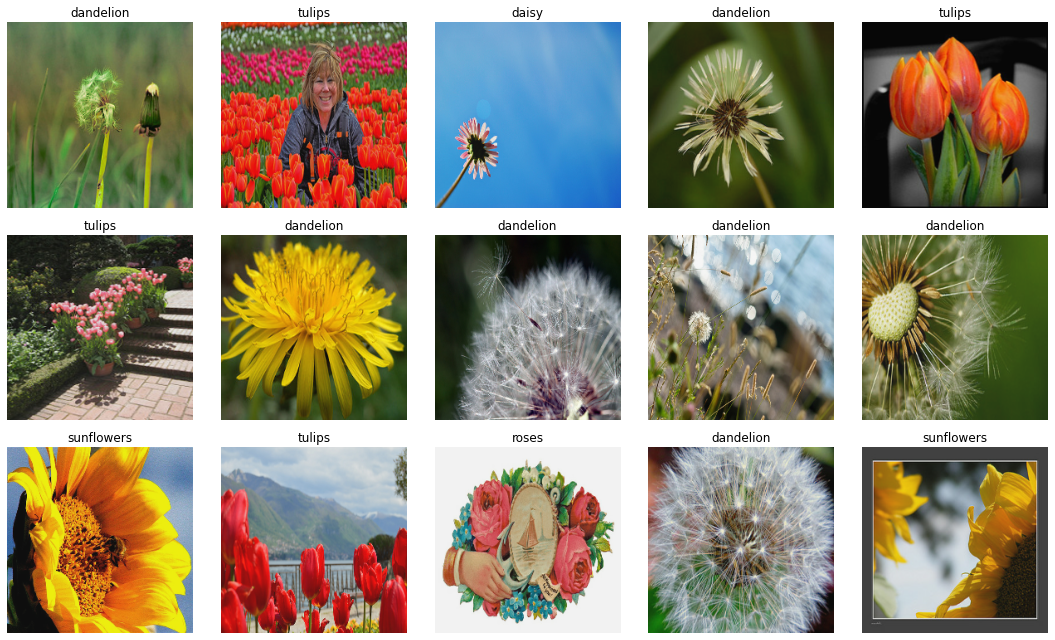

In [26]:
sample_images, sample_labels = next(iter(train_dataset))

plt.figure(figsize=(5 * 3, 3 * 3))
for n in range(15):
    ax = plt.subplot(3, 5, n + 1)
    image = (sample_images[n] * STD + MEAN).numpy()
    image = (image - image.min()) / (
        image.max() - image.min()
    )  # convert to [0, 1] for avoiding matplotlib warning
    plt.imshow(image)
    plt.title(CLASSES[sample_labels[n]])
    plt.axis("off")
plt.tight_layout()
plt.show()


# Learning Rate Scheduler Utility

In [27]:
# Reference:
# https://www.kaggle.com/ashusma/training-rfcx-tensorflow-tpu-effnet-b2


class WarmUpCosine(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(
        self, learning_rate_base, total_steps, warmup_learning_rate, warmup_steps
    ):
        super(WarmUpCosine, self).__init__()

        self.learning_rate_base = learning_rate_base
        self.total_steps = total_steps
        self.warmup_learning_rate = warmup_learning_rate
        self.warmup_steps = warmup_steps
        self.pi = tf.constant(np.pi)

    def __call__(self, step):
        if self.total_steps < self.warmup_steps:
            raise ValueError("Total_steps must be larger or equal to warmup_steps.")
        learning_rate = (
            0.5
            * self.learning_rate_base
            * (
                1
                + tf.cos(
                    self.pi
                    * (tf.cast(step, tf.float32) - self.warmup_steps)
                    / float(self.total_steps - self.warmup_steps)
                )
            )
        )

        if self.warmup_steps > 0:
            if self.learning_rate_base < self.warmup_learning_rate:
                raise ValueError(
                    "Learning_rate_base must be larger or equal to "
                    "warmup_learning_rate."
                )
            slope = (
                self.learning_rate_base - self.warmup_learning_rate
            ) / self.warmup_steps
            warmup_rate = slope * tf.cast(step, tf.float32) + self.warmup_learning_rate
            learning_rate = tf.where(
                step < self.warmup_steps, warmup_rate, learning_rate
            )
        return tf.where(
            step > self.total_steps, 0.0, learning_rate, name="learning_rate"
        )

# Model Utility

In [28]:
def get_model(model_url: str, res: int = IMAGE_SIZE[0], num_classes: int = 5) -> tf.keras.Model:
    inputs = tf.keras.Input((res, res, 3))
    hub_module = hub.KerasLayer(model_url, trainable=True)

    x, _ = hub_module(inputs) # Second output in the tuple is a dictionary containing attention scores.
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    return tf.keras.Model(inputs, outputs)

In [29]:
get_model(MODEL_PATH).summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 keras_layer_1 (KerasLayer)  ((None, 192),             5524416   
                              {'transformer_block_3_a            
                             tt': (None, 3, None, Non            
                             e),                                 
                              'transformer_block_9_at            
                             t': (None, 3, None, None            
                             ),                                  
                              'transformer_block_10_a            
                             tt': (None, 3, None, Non            
                             e),                                 
                              'transformer_block_2_at      

# Training Hyperparameters

In [30]:
EPOCHS = 10
WARMUP_STEPS = 10
INIT_LR = 0.03
WAMRUP_LR = 0.006

TOTAL_STEPS = int((num_train / BATCH_SIZE) * EPOCHS)

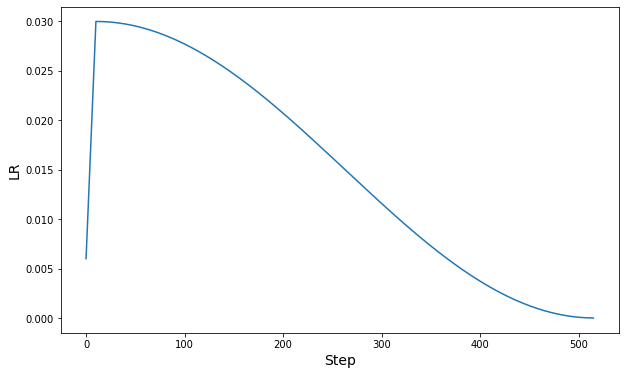

In [31]:
scheduled_lrs = WarmUpCosine(
    learning_rate_base=INIT_LR,
    total_steps=TOTAL_STEPS,
    warmup_learning_rate=WAMRUP_LR,
    warmup_steps=WARMUP_STEPS,
)

lrs = [scheduled_lrs(step) for step in range(TOTAL_STEPS)]
plt.figure(figsize=(10, 6))
plt.plot(lrs)
plt.xlabel("Step", fontsize=14)
plt.ylabel("LR", fontsize=14)
plt.show()

In [32]:
optimizer = keras.optimizers.SGD(scheduled_lrs)
loss = keras.losses.SparseCategoricalCrossentropy()

# Training & Validation

In [33]:
with strategy.scope(): # this line is all that is needed to run on TPU (or multi-GPU, ...)
  model = get_model(MODEL_PATH)
  model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

history = model.fit(train_dataset, validation_data=val_dataset, epochs=EPOCHS)

Epoch 1/10
52/52 [==============================] - 67s 883ms/step - loss: 0.8198 - accuracy: 0.7230 - val_loss: 0.2744 - val_accuracy: 0.8992
Epoch 2/10
52/52 [==============================] - 44s 841ms/step - loss: 0.1853 - accuracy: 0.9404 - val_loss: 0.2459 - val_accuracy: 0.8992
Epoch 3/10
52/52 [==============================] - 44s 849ms/step - loss: 0.0710 - accuracy: 0.9770 - val_loss: 0.1298 - val_accuracy: 0.9537
Epoch 4/10
52/52 [==============================] - 44s 847ms/step - loss: 0.0242 - accuracy: 0.9955 - val_loss: 0.1168 - val_accuracy: 0.9537
Epoch 5/10
52/52 [==============================] - 44s 850ms/step - loss: 0.0119 - accuracy: 0.9982 - val_loss: 0.1151 - val_accuracy: 0.9591
Epoch 6/10
52/52 [==============================] - 44s 847ms/step - loss: 0.0087 - accuracy: 0.9979 - val_loss: 0.1157 - val_accuracy: 0.9537
Epoch 7/10
52/52 [==============================] - 44s 848ms/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.1215 - val_accuracy: 0.9537

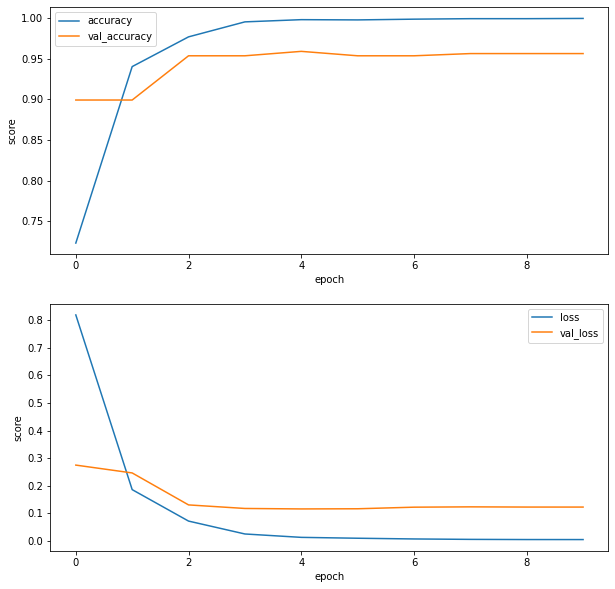

In [34]:
result = pd.DataFrame(history.history)
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
result[["accuracy", "val_accuracy"]].plot(xlabel="epoch", ylabel="score", ax=ax[0])
result[["loss", "val_loss"]].plot(xlabel="epoch", ylabel="score", ax=ax[1])


# Predictions

In [35]:
sample_images, sample_labels = next(iter(val_dataset))

predictions = model.predict(sample_images, batch_size=16).argmax(axis=-1)
evaluations = model.evaluate(sample_images, sample_labels, batch_size=16)

print("[val_loss, val_acc]", evaluations)

4/4 [==============================] - 2s 84ms/step - loss: 0.2126 - accuracy: 0.9062
[val_loss, val_acc] [0.2126321941614151, 0.90625]


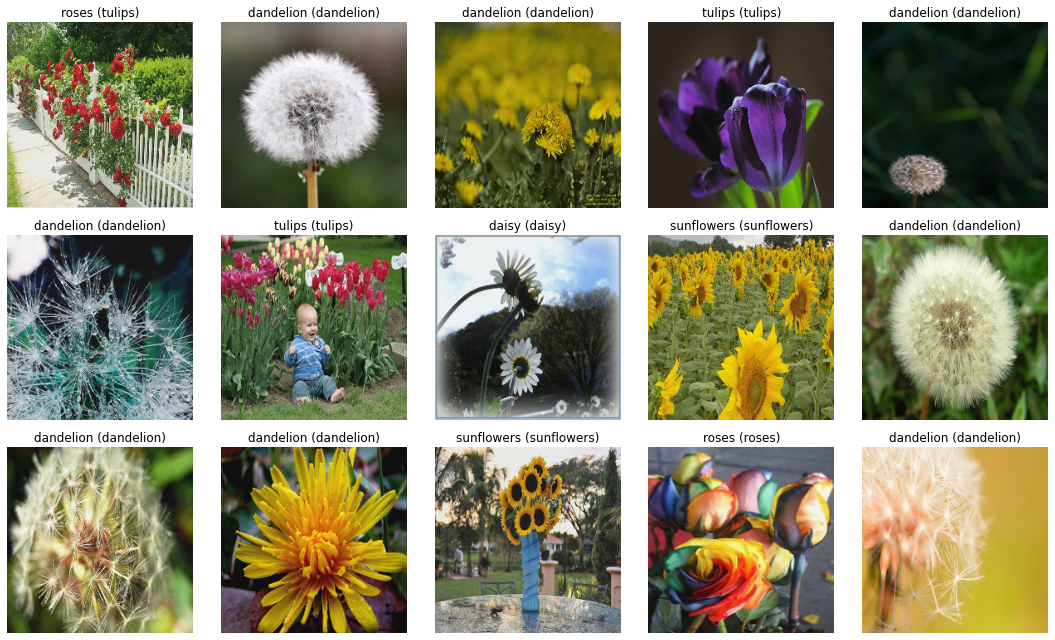

In [36]:
plt.figure(figsize=(5 * 3, 3 * 3))
for n in range(15):
    ax = plt.subplot(3, 5, n + 1)
    image = (sample_images[n] * STD + MEAN).numpy()
    image = (image - image.min()) / (
        image.max() - image.min()
    )  # convert to [0, 1] for avoiding matplotlib warning
    plt.imshow(image)
    target = CLASSES[sample_labels[n]]
    pred = CLASSES[predictions[n]]
    plt.title("{} ({})".format(target, pred))
    plt.axis("off")
plt.tight_layout()
plt.show()

# Reference
* [Keras Flowers on TPU (solution)](https://colab.research.google.com/github/GoogleCloudPlatform/training-data-analyst/blob/master/courses/fast-and-lean-data-science/07_Keras_Flowers_TPU_solution.ipynb)


This notebook is copied and modified from [here](https://github.com/sayakpaul/ConvNeXt-TF/blob/main/notebooks/finetune.ipynb). I'm thankful to [awsaf49](https://github.com/awsaf49) who originally worked on that notebook. 